## Initial library import / set default plt setting

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (20, 10)

sns.set(rc={'figure.figsize':(11.7,8.27)})


# Load the dataset

In [3]:
dataset = pd.read_csv("./13717335.csv")
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-16,Albury,14.9,26.7,0.0,NaN,NaN,SW,56.0,WSW,...,46.0,20.0,1014.1,1012.7,NaN,NaN,18.0,25.5,No,No
1,2009-01-24,Albury,20.8,30.6,0.0,NaN,NaN,W,54.0,W,...,41.0,21.0,1005.4,1007.6,NaN,NaN,23.3,29.7,No,No
2,2009-01-25,Albury,14.0,34.3,0.0,NaN,NaN,WSW,24.0,ESE,...,44.0,10.0,1016.5,1014.6,NaN,NaN,21.2,32.1,No,No
3,2009-03-09,Albury,13.8,31.8,0.0,NaN,NaN,NNE,24.0,SSE,...,49.0,28.0,1019.7,1015.9,NaN,NaN,18.6,30.5,No,No
4,2009-05-29,Albury,2.2,16.5,0.0,NaN,NaN,ESE,33.0,NaN,...,67.0,44.0,1025.6,1024.0,NaN,NaN,10.2,15.9,No,No


In [4]:
dataset.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

## Initial data preparation

In [5]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [6]:
dataset.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [7]:
dataset.sort_values(by=['Date'], inplace=True)

In [8]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
917,2007-12-19,Canberra,12.8,21.0,0.0,6.4,0.8,NE,22.0,NE,...,72.0,54.0,1018.0,1015.6,8.0,8.0,16.1,20.0,No,Yes
918,2007-12-21,Canberra,14.8,29.5,6.4,1.8,8.1,N,41.0,NW,...,81.0,48.0,1012.9,1008.3,2.0,7.0,21.0,28.2,Yes,Yes
622,2008-03-19,Sydney,19.9,26.9,0.0,6.6,6.3,NaN,NaN,SSE,...,70.0,60.0,1021.2,1019.4,5.0,7.0,23.9,24.9,No,No
623,2008-04-04,Sydney,11.2,22.2,0.0,7.6,10.6,NaN,NaN,W,...,47.0,37.0,1020.8,1019.2,1.0,0.0,13.9,21.0,No,No
919,2008-04-06,Canberra,5.9,21.8,0.0,2.8,9.3,E,35.0,SSW,...,70.0,35.0,1028.0,1024.1,1.0,5.0,12.9,20.8,No,No


# Check for NA values

In [9]:
dataset.isna().sum()

Date                0
Location            0
MinTemp            26
MaxTemp            26
Rainfall           56
Evaporation      1275
Sunshine         1386
WindGustDir       185
WindGustSpeed     184
WindDir9am        214
WindDir3pm         72
WindSpeed9am       35
WindSpeed3pm       50
Humidity9am        56
Humidity3pm        85
Pressure9am       291
Pressure3pm       291
Cloud9am         1174
Cloud3pm         1244
Temp9am            33
Temp3pm            61
RainToday          56
RainTomorrow       57
dtype: int64

In [10]:
dataset.describe() 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,2974.000000,2974.000000,2944.000000,1725.000000,1614.000000,2816.000000,2965.000000,2950.000000,2944.000000,2915.000000,2709.000000,2709.000000,1826.000000,1756.000000,2967.000000,2939.000000
mean,12.260390,23.251917,2.369871,5.542319,7.547336,39.755327,14.157167,18.568814,68.710258,51.696055,1017.721078,1015.312994,4.423877,4.441344,17.033738,21.708268
std,6.591301,7.228495,7.874595,4.213599,3.791996,13.400941,8.832463,8.764341,19.592292,21.301096,7.182184,7.156272,2.913729,2.744272,6.654810,7.015295
min,-5.300000,-2.300000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,987.100000,982.200000,0.000000,0.000000,-3.400000,-3.200000
25%,7.500000,18.000000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.100000,1010.500000,1.000000,2.000000,12.350000,16.700000
50%,12.150000,22.700000,0.000000,4.800000,8.400000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.600000,1015.100000,5.000000,5.000000,16.800000,21.100000
75%,17.000000,28.400000,0.800000,7.400000,10.600000,46.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.100000,7.000000,7.000000,21.600000,26.600000
max,31.900000,44.100000,172.200000,50.800000,13.700000,98.000000,74.000000,69.000000,100.000000,100.000000,1038.800000,1036.800000,8.000000,8.000000,37.700000,43.000000


## Explore the date value

In [11]:
dataset["Date"].describe()


/tmp/ipykernel_8702/3984509456.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset["Date"].describe()


count                    3000
unique                   1939
top       2016-02-20 00:00:00
freq                        6
first     2007-12-19 00:00:00
last      2017-06-25 00:00:00
Name: Date, dtype: object

## Explore the locations value

In [12]:
dataset["Location"].describe()

count       3000
unique        49
top       Albury
freq          79
Name: Location, dtype: object

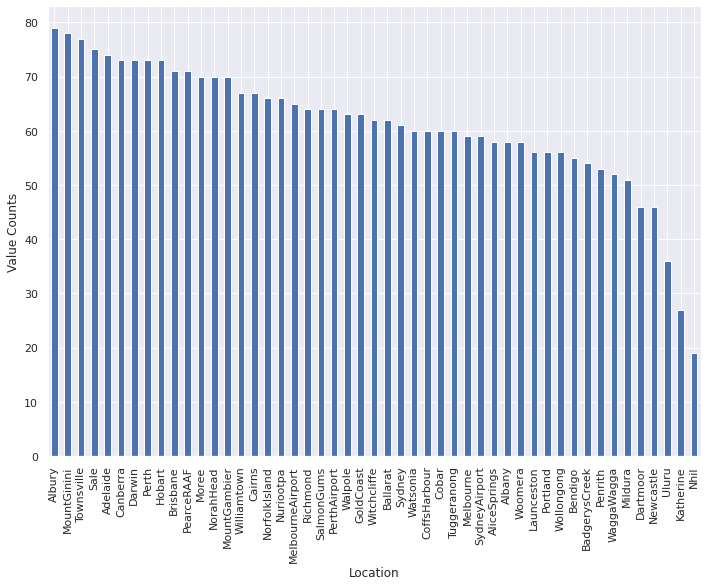

In [13]:
locationValCount = dataset["Location"].value_counts()
locationValCount.plot.bar()
plt.xlabel("Location")
plt.ylabel("Value Counts")
plt.show()

Explore the rainfall attribute

## Explore the Min Temp attribute

In [14]:
dataset["MinTemp"].describe()

count    2974.000000
mean       12.260390
std         6.591301
min        -5.300000
25%         7.500000
50%        12.150000
75%        17.000000
max        31.900000
Name: MinTemp, dtype: float64

/tmp/ipykernel_8702/4070892354.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['MinTemp'],x=dataset['MinTemp']).set(xlabel='Degrees Celsius',yLabel="MinTemp")


[Text(0.5, 0, 'Degrees Celsius'), Text(0, 0.5, 'MinTemp')]

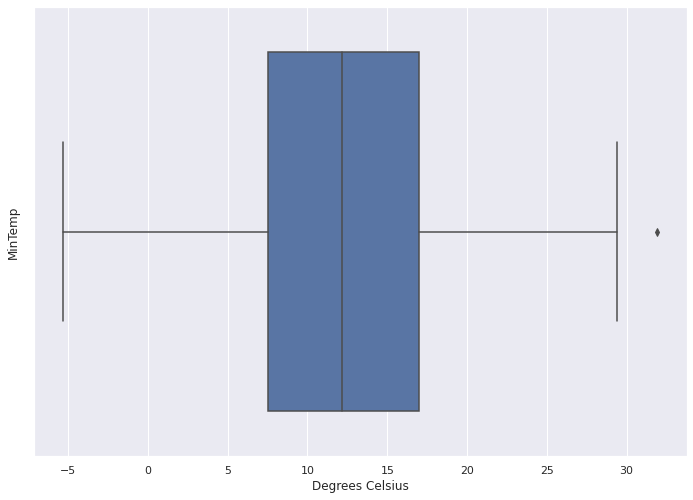

In [15]:
sns.boxplot(data = dataset['MinTemp'],x=dataset['MinTemp']).set(xlabel='Degrees Celsius',yLabel="MinTemp")


## Explore the Max Temp attribute 

In [16]:
dataset["MaxTemp"].describe()

count    2974.000000
mean       23.251917
std         7.228495
min        -2.300000
25%        18.000000
50%        22.700000
75%        28.400000
max        44.100000
Name: MaxTemp, dtype: float64

/tmp/ipykernel_8702/2712523240.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['MaxTemp'],x=dataset['MaxTemp']).set(xlabel='Degrees Celsius',yLabel="MaxTemp")


[Text(0.5, 0, 'Degrees Celsius'), Text(0, 0.5, 'MaxTemp')]

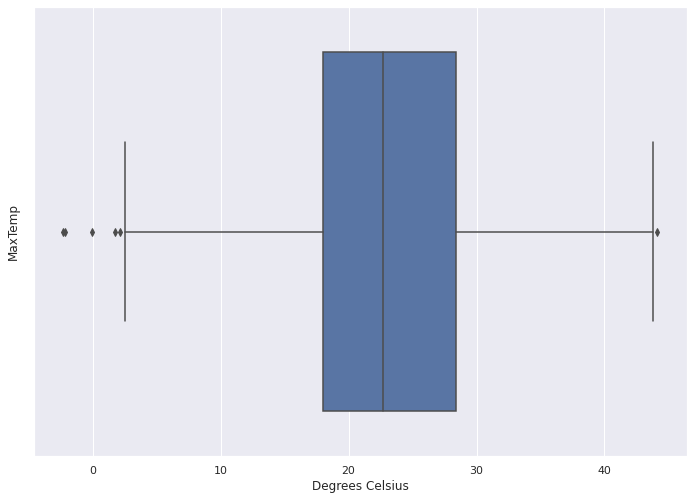

In [17]:
sns.boxplot(data = dataset['MaxTemp'],x=dataset['MaxTemp']).set(xlabel='Degrees Celsius',yLabel="MaxTemp")


## Explore the Rainfall attribute

In [18]:
dataset["Rainfall"].describe()

count    2944.000000
mean        2.369871
std         7.874595
min         0.000000
25%         0.000000
50%         0.000000
75%         0.800000
max       172.200000
Name: Rainfall, dtype: float64

In [19]:
dataset['Rainfall'].isna().sum()

56

Rainfall
(0, 10]       879
(10, 20]      121
(20, 30]       37
(30, 40]       14
(40, 50]        8
(50, 100]      14
(100, 200]      2
Name: Rainfall, dtype: int64


<AxesSubplot:xlabel='Rainfall'>

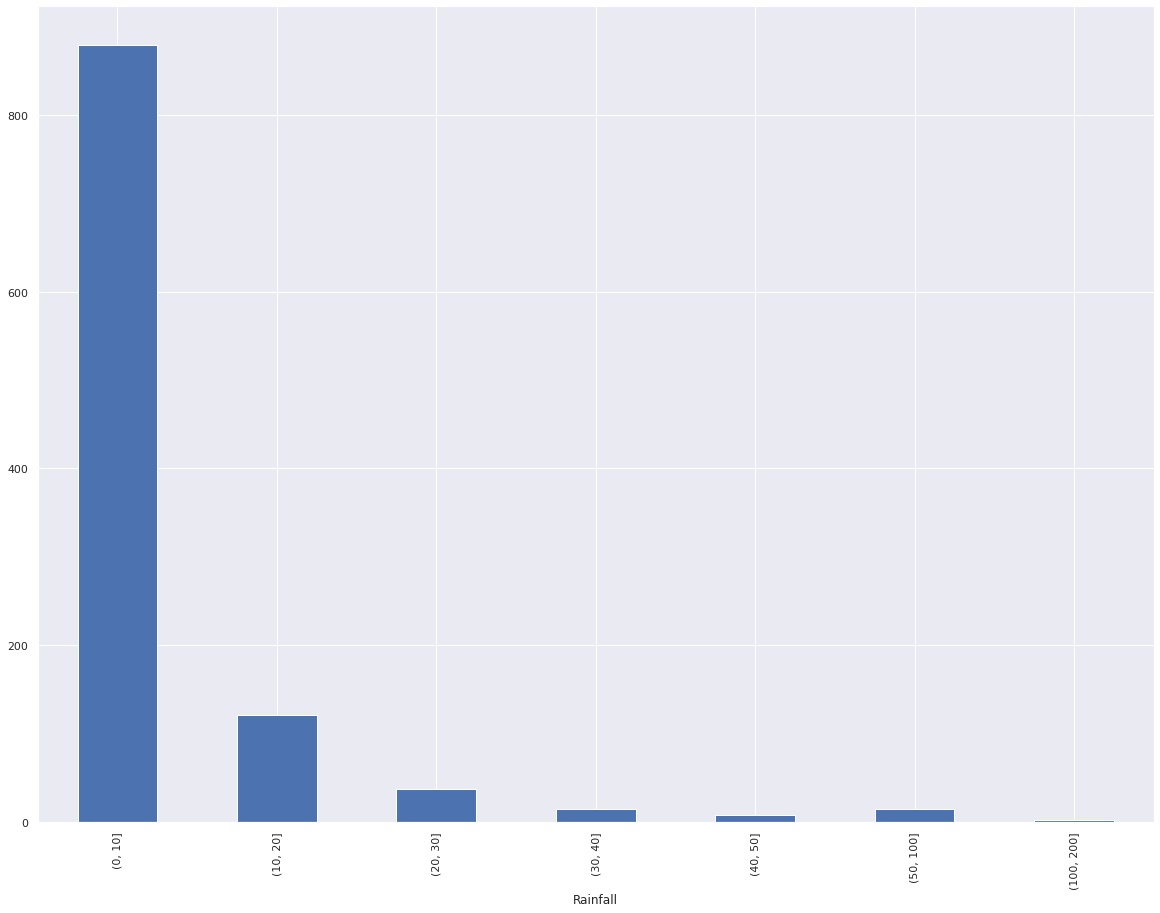

In [53]:
bins = [0,10,20,30,40,50,100,200] 
df = dataset.groupby(pd.cut(dataset['Rainfall'], bins=bins)).Rainfall.count()
plt.figure(figsize=(20,15))
plt.ylabel = "mm"
print(df)
df.plot(kind='bar')

In [21]:
dataset['Evaporation'].isna().sum()

1275

It seems that the data of the Evaporation columns have a lot of NA in it

In [22]:
dataset['Evaporation'].describe()

count    1725.000000
mean        5.542319
std         4.213599
min         0.000000
25%         2.600000
50%         4.800000
75%         7.400000
max        50.800000
Name: Evaporation, dtype: float64

/tmp/ipykernel_8702/4232871122.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['Evaporation'],x=dataset['Evaporation']).set(xlabel='millimetres',yLabel="Evaporation")


[Text(0.5, 0, 'millimetres'), Text(0, 0.5, 'Evaporation')]

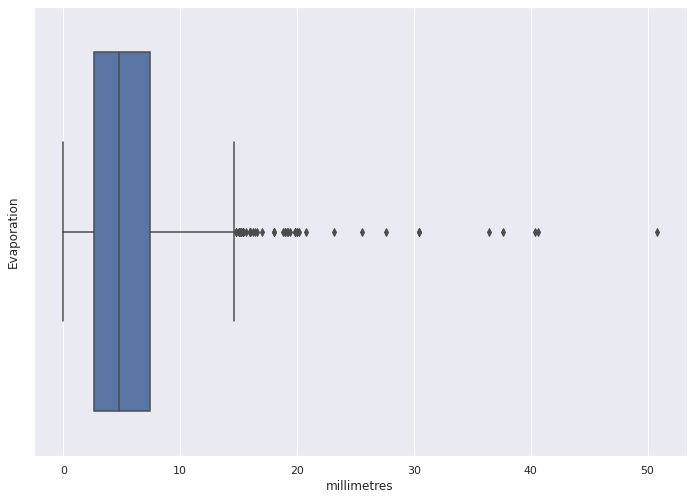

In [23]:
sns.boxplot(data = dataset['Evaporation'],x=dataset['Evaporation']).set(xlabel='millimetres',yLabel="Evaporation")


In [24]:
dataset['Sunshine'].isna().sum()

1386

The same also goes to the SunShine Attribute

In [25]:
dataset['Sunshine'].describe()

count    1614.000000
mean        7.547336
std         3.791996
min         0.000000
25%         4.700000
50%         8.400000
75%        10.600000
max        13.700000
Name: Sunshine, dtype: float64

/tmp/ipykernel_8702/3739194680.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['Sunshine'],x=dataset['Sunshine']).set(xlabel='Hours',yLabel="Sun Shine")


[Text(0.5, 0, 'Hours'), Text(0, 0.5, 'Sun Shine')]

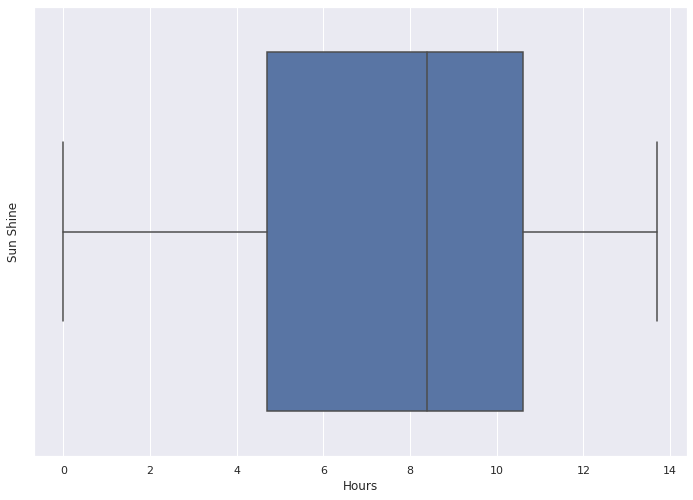

In [26]:

sns.boxplot(data = dataset['Sunshine'],x=dataset['Sunshine']).set(xlabel='Hours',yLabel="Sun Shine")


## Evaluate the Wind Gust Dir Attribute

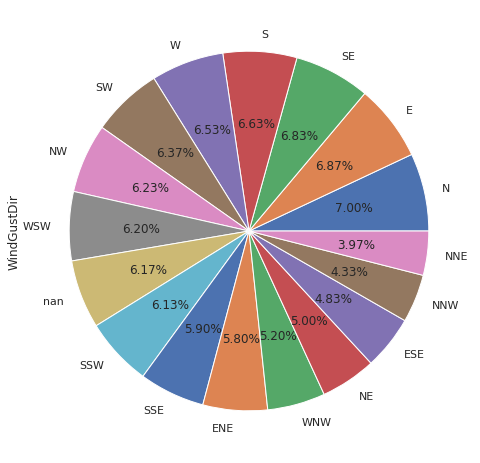

In [27]:
pieChartVal = dataset['WindGustDir'].value_counts(dropna=False)
pieChartVal.plot.pie(autopct='%.2f%%')

plt.show()


In [28]:
dataset['WindGustSpeed'].describe()

count    2816.000000
mean       39.755327
std        13.400941
min        11.000000
25%        31.000000
50%        39.000000
75%        46.000000
max        98.000000
Name: WindGustSpeed, dtype: float64

/tmp/ipykernel_8702/2957407090.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['WindGustSpeed'],x=dataset['WindGustSpeed']).set(xlabel='km/h',yLabel="WindGustSpeed")


[Text(0.5, 0, 'km/h'), Text(0, 0.5, 'WindGustSpeed')]

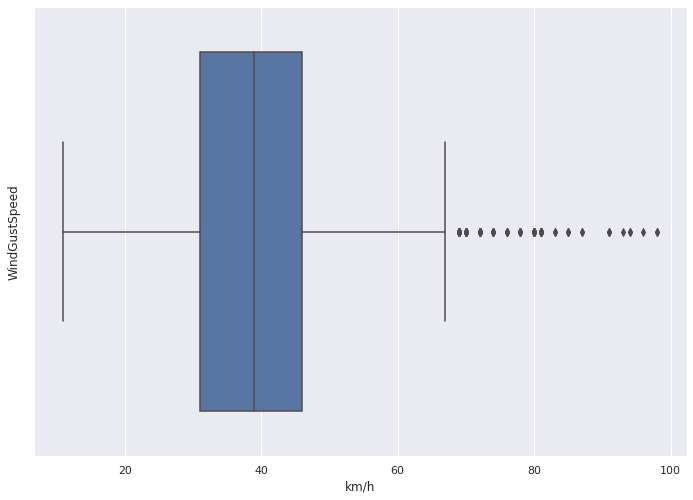

In [29]:
sns.boxplot(data = dataset['WindGustSpeed'],x=dataset['WindGustSpeed']).set(xlabel='km/h',yLabel="WindGustSpeed")


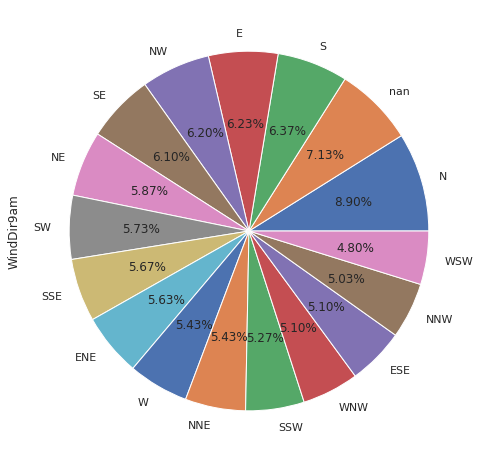

In [30]:
pieChartVal = dataset['WindDir9am'].value_counts(dropna=False)
pieChartVal.plot.pie(autopct='%.2f%%')
plt.show()

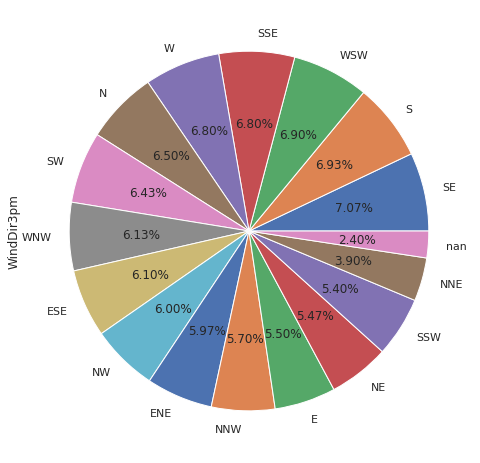

In [31]:
pieChartVal = dataset['WindDir3pm'].value_counts(dropna=False)
pieChartVal.plot.pie(autopct='%.2f%%')
plt.show()

In [32]:
dataset['WindSpeed9am'].describe()

count    2965.000000
mean       14.157167
std         8.832463
min         0.000000
25%         7.000000
50%        13.000000
75%        19.000000
max        74.000000
Name: WindSpeed9am, dtype: float64

/tmp/ipykernel_8702/1607886833.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['WindSpeed9am'],x=dataset['WindSpeed9am']).set(xlabel='mm',yLabel="WindSpeed9am")


[Text(0.5, 0, 'mm'), Text(0, 0.5, 'WindSpeed9am')]

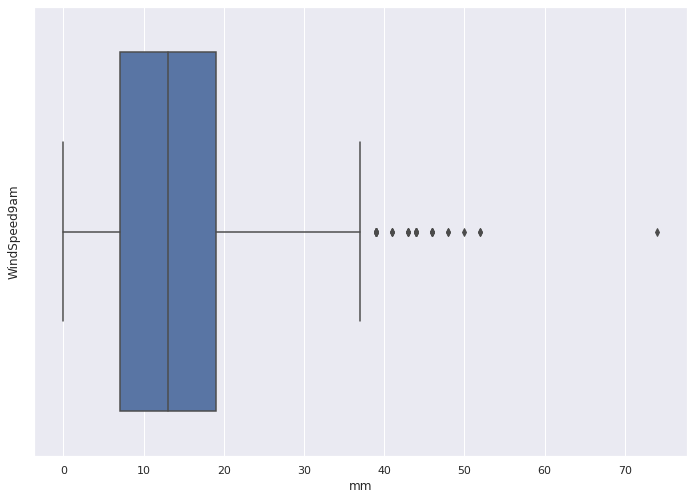

In [33]:
sns.boxplot(data = dataset['WindSpeed9am'],x=dataset['WindSpeed9am']).set(xlabel='mm',yLabel="WindSpeed9am")


In [34]:
dataset['WindSpeed3pm'].describe()

count    2950.000000
mean       18.568814
std         8.764341
min         0.000000
25%        13.000000
50%        17.000000
75%        24.000000
max        69.000000
Name: WindSpeed3pm, dtype: float64

/tmp/ipykernel_8702/2999812027.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['WindSpeed3pm'],x=dataset['WindSpeed3pm']).set(xlabel='mm',yLabel="WindSpeed3pm")


[Text(0.5, 0, 'mm'), Text(0, 0.5, 'WindSpeed3pm')]

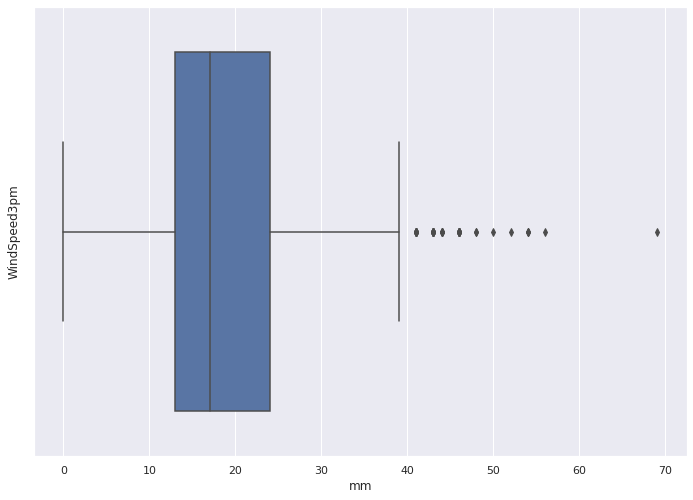

In [35]:
sns.boxplot(data = dataset['WindSpeed3pm'],x=dataset['WindSpeed3pm']).set(xlabel='mm',yLabel="WindSpeed3pm")


In [36]:
dataset['Humidity9am'].describe()

count    2944.000000
mean       68.710258
std        19.592292
min         0.000000
25%        57.000000
50%        70.000000
75%        83.000000
max       100.000000
Name: Humidity9am, dtype: float64

/tmp/ipykernel_8702/631722724.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['Humidity9am'],x=dataset['Humidity9am']).set(xlabel='%',yLabel="Humidity9am")


[Text(0.5, 0, '%'), Text(0, 0.5, 'Humidity9am')]

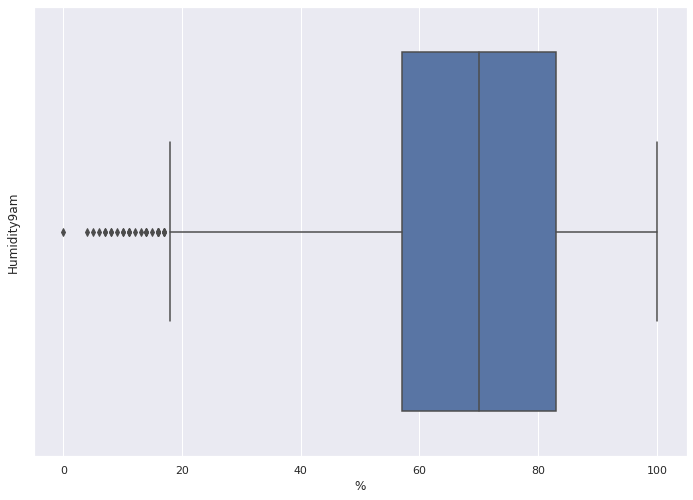

In [37]:
sns.boxplot(data = dataset['Humidity9am'],x=dataset['Humidity9am']).set(xlabel='%',yLabel="Humidity9am")


/tmp/ipykernel_8702/1608044409.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['Humidity3pm'],x=dataset['Humidity3pm']).set(xlabel='%',yLabel="Humidity3pm")


[Text(0.5, 0, '%'), Text(0, 0.5, 'Humidity3pm')]

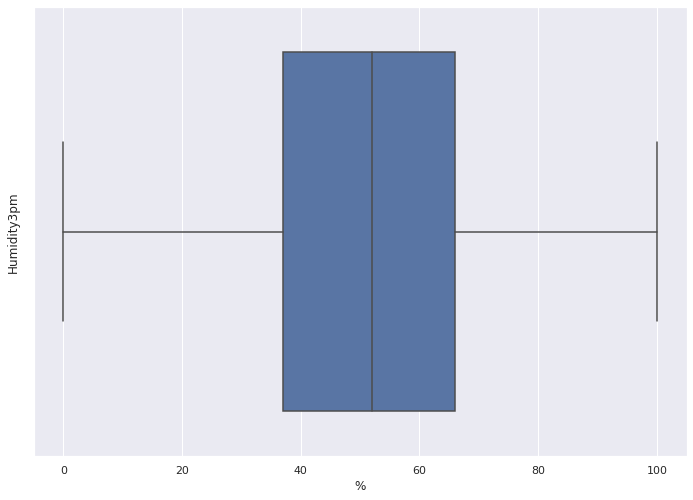

In [38]:
sns.boxplot(data = dataset['Humidity3pm'],x=dataset['Humidity3pm']).set(xlabel='%',yLabel="Humidity3pm")


/tmp/ipykernel_8702/1441654184.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['Pressure9am'],x=dataset['Pressure9am']).set(xlabel='hectopascals',yLabel="Pressure9am")


[Text(0.5, 0, 'hectopascals'), Text(0, 0.5, 'Pressure9am')]

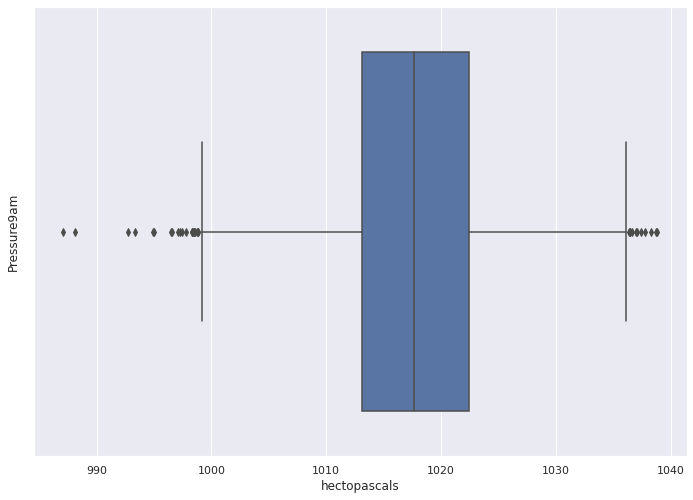

In [39]:
sns.boxplot(data = dataset['Pressure9am'],x=dataset['Pressure9am']).set(xlabel='hectopascals',yLabel="Pressure9am")

/tmp/ipykernel_8702/3582413965.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['Pressure3pm'],x=dataset['Pressure3pm']).set(xlabel='hectopascals',yLabel="Pressure3pm")


[Text(0.5, 0, 'hectopascals'), Text(0, 0.5, 'Pressure3pm')]

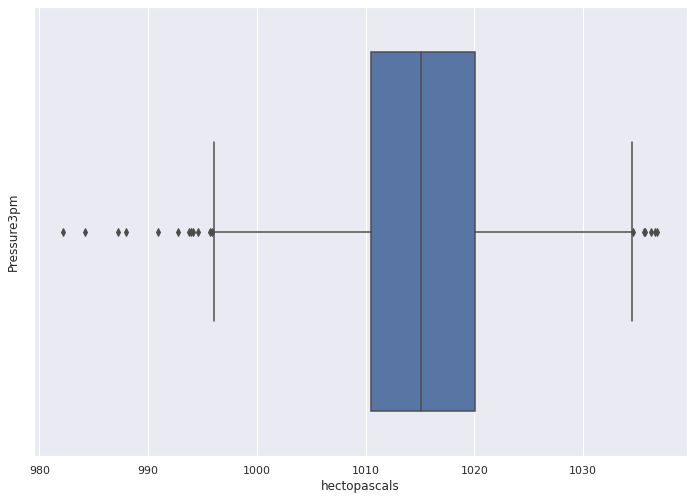

In [40]:
sns.boxplot(data = dataset['Pressure3pm'],x=dataset['Pressure3pm']).set(xlabel='hectopascals',yLabel="Pressure3pm")

/tmp/ipykernel_8702/456613822.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['Cloud9am'],x=dataset['Cloud9am']).set(xlabel='Eighth',yLabel="Cloud9am")


[Text(0.5, 0, 'Eighth'), Text(0, 0.5, 'Cloud9am')]

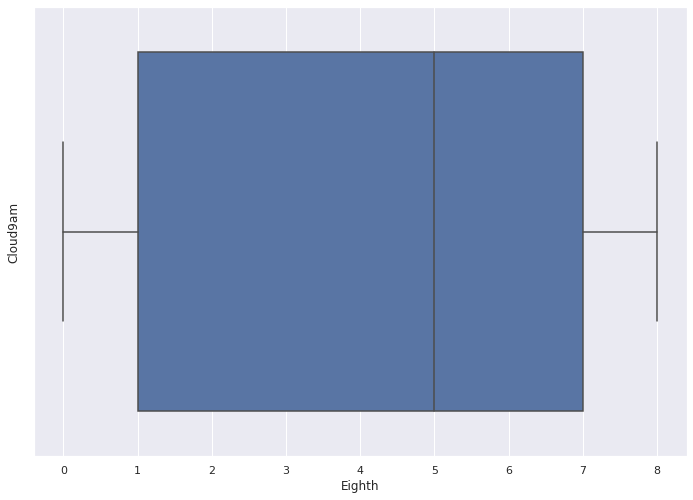

In [41]:
sns.boxplot(data = dataset['Cloud9am'],x=dataset['Cloud9am']).set(xlabel='Eighth',yLabel="Cloud9am")

/tmp/ipykernel_8702/3164725522.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['Cloud3pm'],x=dataset['Cloud3pm']).set(xlabel='Eighth',yLabel="Cloud3pm")


[Text(0.5, 0, 'Eighth'), Text(0, 0.5, 'Cloud3pm')]

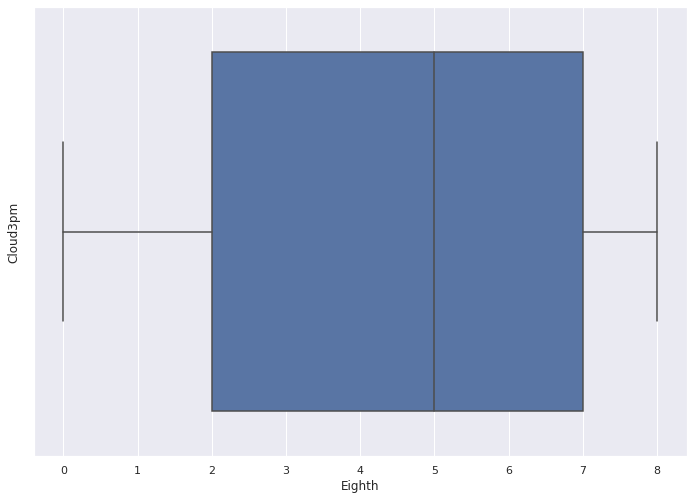

In [42]:
sns.boxplot(data = dataset['Cloud3pm'],x=dataset['Cloud3pm']).set(xlabel='Eighth',yLabel="Cloud3pm")


/tmp/ipykernel_8702/2965810282.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['Temp9am'],x=dataset['Temp9am']).set(xlabel='Degree Celsius',yLabel="Temp9am")


[Text(0.5, 0, 'Degree Celsius'), Text(0, 0.5, 'Temp9am')]

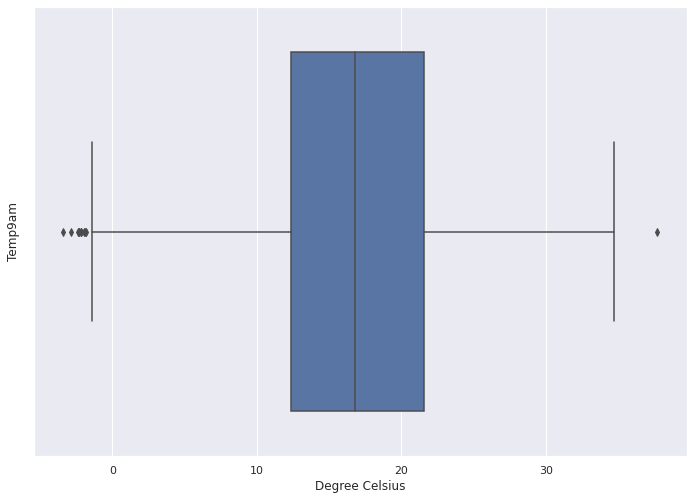

In [43]:
sns.boxplot(data = dataset['Temp9am'],x=dataset['Temp9am']).set(xlabel='Degree Celsius',yLabel="Temp9am")

/tmp/ipykernel_8702/2395495787.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(data = dataset['Temp3pm'],x=dataset['Temp3pm']).set(xlabel='Degree Celsius',yLabel="Temp3pm")


[Text(0.5, 0, 'Degree Celsius'), Text(0, 0.5, 'Temp3pm')]

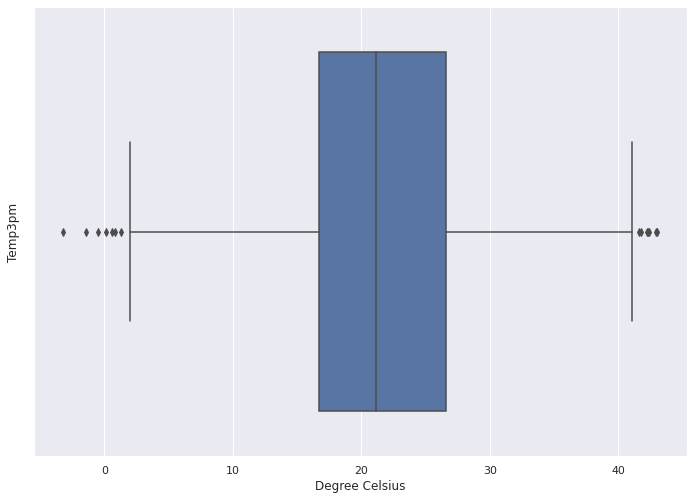

In [44]:
sns.boxplot(data = dataset['Temp3pm'],x=dataset['Temp3pm']).set(xlabel='Degree Celsius',yLabel="Temp3pm")


## Count the number of Yes/No value in RainToday/RainTomorrow

Number of values NA in RainToday Attribute: 56
Number of values No in RainToday Attribute: 2268
Number of values Yes in RainToday Attribute: 676


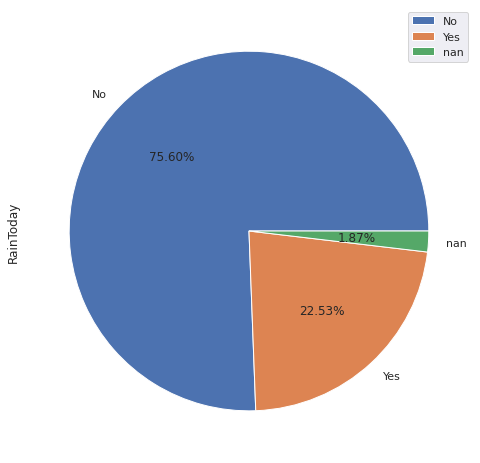

In [45]:
numberOfNo = dataset['RainToday'].value_counts()['No']
numberOfYes = dataset['RainToday'].value_counts()['Yes']
attributeIsNA = dataset['RainToday'].isna().sum()
print("Number of values NA in RainToday Attribute: {}".format(attributeIsNA))
print("Number of values No in RainToday Attribute: {}".format(numberOfNo))
print("Number of values Yes in RainToday Attribute: {}".format(numberOfYes))


pieChartVal = pd.DataFrame(dataset['RainToday'].value_counts(dropna=False))
pieChartVal.plot.pie(autopct='%.2f%%',subplots=True) # add percentage, rounded to 2 decimal places
plt.show()


Number of values No in RainTomorrow Attribute: 2328
Number of values Yes in RainTomorrow Attribute: 615


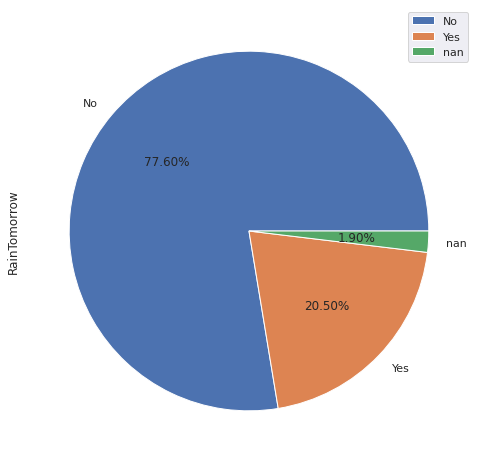

In [46]:
numberOfNo = dataset['RainTomorrow'].value_counts()['No']
numberOfYes = dataset['RainTomorrow'].value_counts()['Yes']
print("Number of values No in RainTomorrow Attribute: {}".format(numberOfNo))
print("Number of values Yes in RainTomorrow Attribute: {}".format(numberOfYes))
pieChartVal = pd.DataFrame(dataset['RainTomorrow'].value_counts(dropna=False))
pieChartVal.plot.pie(autopct='%.2f%%',subplots=True)
plt.show()


# 1B - Data preprocessing

## 1 Binnarization
### 1.1 Equi-width Binning 

### 1.1 Equi-depth Binning